# Broadway Grosses Data Investigation
* Author: Julia Moran
* Major: Computer Science
* Creation Date: April 27, 2022
* Due Date: May 11, 2022
* Course: CSC223 010
* Professor Name: Prof. Earl
* Assignment: Final Program
* Filename: main.ipynb
* Purpose: Investigates a dataset regarding shows performed on Broadway

## Introduction

The grosses.csv file contains weekly data about shows performed on Broadway, beginning at June 9, 1985 and ending at March 1, 2020. The data within the grosses.csv file includes the total gross earned that week, the shows and the theatres the shows were performed in, the weekly gross and potenial gross for each show's weekly data, and more, such as the average price for a ticket for each show. 

The cpi.csv file contains monthly data about the Consumer Price Index in urban cities, which essentially serves as a measurement of inflation. 

* Source: https://www.kaggle.com/datasets/jessemostipak/broadway-weekly-grosses
* Authors: Jesse Mostipak and Alex Cookson
* Updated: April 28, 2020

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
#Read the grosses.csv file
grosses = pd.read_csv("grosses.csv")

#Transform the week_ending to a datetime object
grosses['week_ending'] = pd.to_datetime(grosses['week_ending'])

#In the dataset, the Helen Hayes Theatre was sometimes mispelled as the Helen Hayes Theater, so all instances
#of Helen Hayes Theater are replaced with the Helen Hayes Theatre
grosses['theatre'] = grosses["theatre"].replace("Helen Hayes Theater", "Helen Hayes Theatre")

#The weekly overall gross is converted to millions of dollars in order to prevent the data from being expressed
#in scientific notation
grosses["weekly_gross_overall"] = grosses["weekly_gross_overall"] / 100000

#The weekly gross is converted to thousands of dollars in order to prevent the data from being expressed
#in scientific notation
grosses["weekly_gross"] = grosses["weekly_gross"] / 1000

## Quanitative Data Visualization

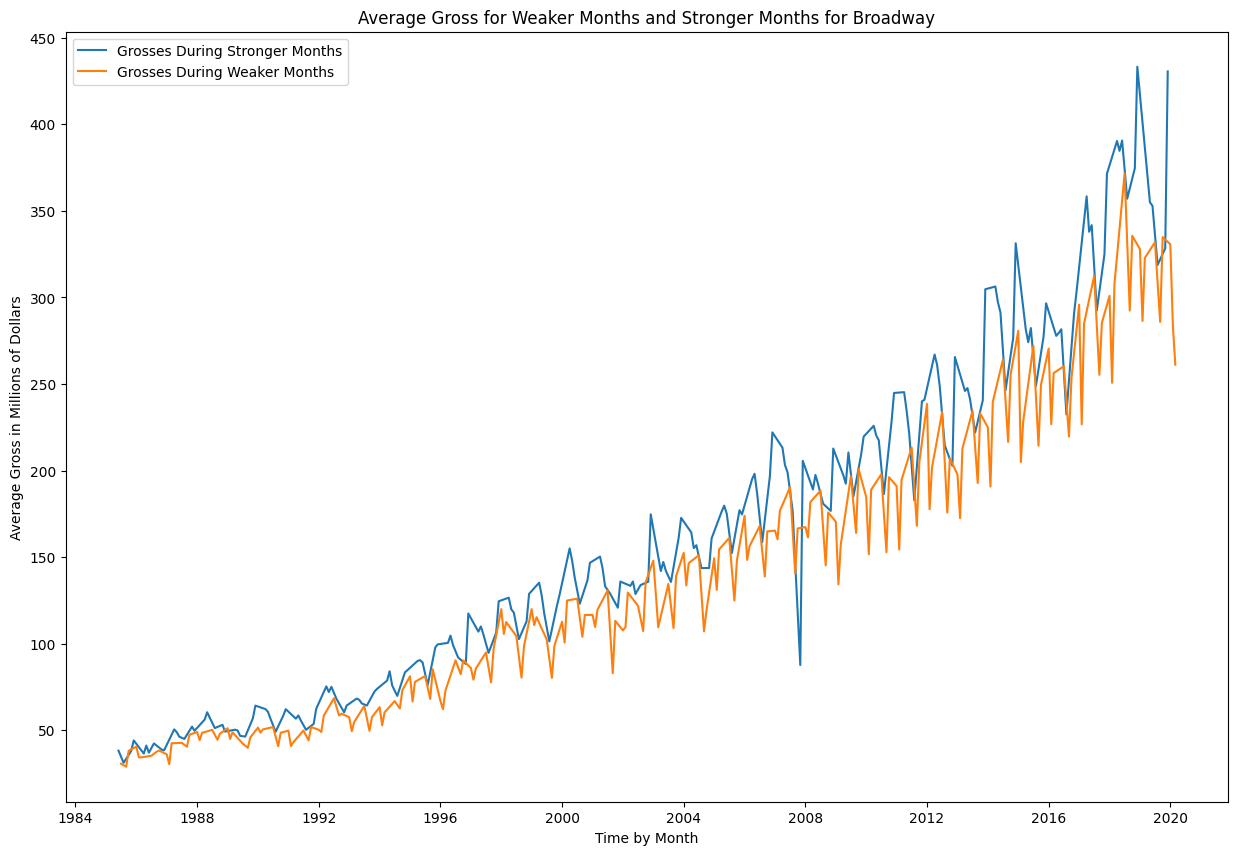

In [6]:
#Group the grosses by week and resample them into months
grossesByMonth = grosses.groupby('week_ending')["weekly_gross_overall"].agg(['mean']).resample('MS').mean()

#Seperate the grosses by the weaker sales months
weakMonths = grossesByMonth[(grossesByMonth.index.month == 9) | (grossesByMonth.index.month == 10)
                            | (grossesByMonth.index.month == 3) | (grossesByMonth.index.month == 1)
                            | (grossesByMonth.index.month == 2) | (grossesByMonth.index.month == 7)]

#Seperate the grosses by the stronger sales months
strongMonths = grossesByMonth[(grossesByMonth.index.month == 12) | (grossesByMonth.index.month == 8)
                            | (grossesByMonth.index.month == 4) | (grossesByMonth.index.month == 5) 
                            | (grossesByMonth.index.month == 6) | (grossesByMonth.index.month == 11)]

#Plot the data for the two groups of months
plt.figure(figsize = (15, 10))
plt.plot(strongMonths, label = "Grosses During Stronger Months")
plt.plot(weakMonths, label = "Grosses During Weaker Months")

#Label the graph
plt.xlabel("Time by Month")
plt.ylabel("Average Gross in Millions of Dollars")
plt.title("Average Gross for Weaker Months and Stronger Months for Broadway")
plt.legend();

**Summary:** According to NYTIX.com at https://www.nytix.com/articles/broadway-seasons, September, October, January, February, March, and July are the months where Broadway sales are lower, and December, November, April, May, June, and August are when sales are higher, mostly due to the fact that Broadway shows often open in the spring in order to be eligible for the Tony Awards in June, and November and December tend to generate more sales since they are during Thanksgiving and Christmas. This claim was investigated in the above graph, in which the overally weekly gross was grouped by the ending date of the week and resampled to make it the average gross per month by month. The resulting monthly data was then seperated into two groups, one made of grosses from the months said to have less sales and one from the months believed to generate more sales. The two groups were then graphed against each other, and it was found that the grosses from the stronger months tended to be greater than the grosses from the weaker months. This helps to support NYTIX.com's claims about these months.  

## Categorical Data Visualization

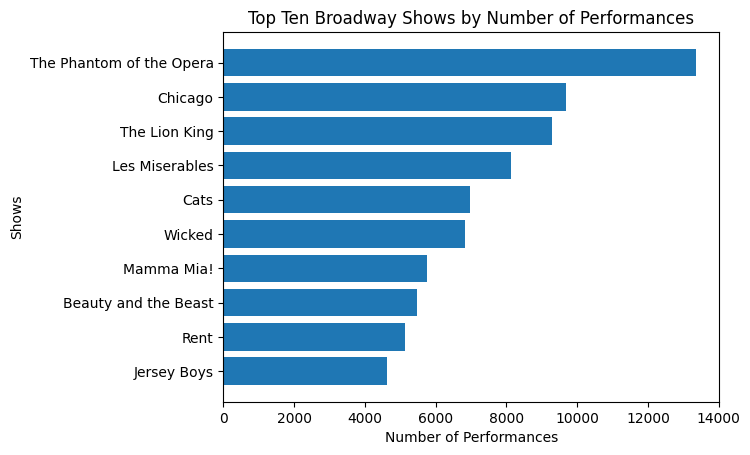

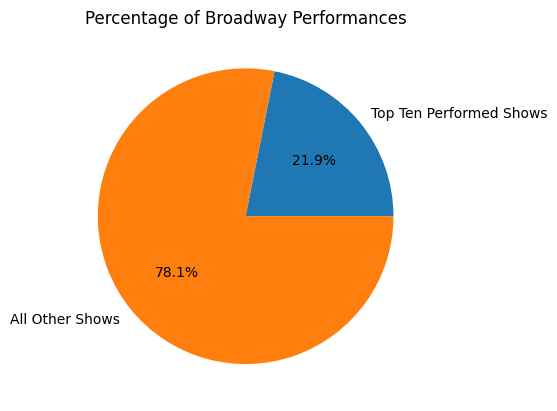

In [7]:
#Seperate the top ten most performed shows from the rest of the data
topTen = grosses.groupby('show')["performances"].agg(['sum']).sort_values('sum').tail(10)
others = grosses.groupby('show')["performances"].agg(['sum']).sort_values('sum').head(1112)

#Plot top ten number of performances by their show titles
plt.figure()
plt.figure(1)
plt.barh(topTen.index, topTen['sum'])

#Label the bar graph
plt.xlabel('Number of Performances')
plt.ylabel('Shows')
plt.title("Top Ten Broadway Shows by Number of Performances")

#Plot a pie chart of the number of top ten shows' number of performances and the other shows' performances
plt.figure(2)
plt.pie([topTen['sum'].sum(), others['sum'].sum()], labels = ['Top Ten Performed Shows', 'All Other Shows'], autopct='%1.1f%%')
plt.title("Percentage of Broadway Performances");

**Summary:** Shows on Broadway can run for a very long time, especially when they are popular. These graphs visualize data relating to the most performed Broadway shows. The bar graph shows the top ten most performed shows on Broadway and the number of performances each show had. The pie chart depicts how much of all Broadway performances consist of the top ten most performed shows. 

As the bar graph shows, the most performed show on Broadway is the Phantom of the Opera, followed by Chicago and The Lion King. It is worth noting that the bar graph shows there is large difference between the number of Phantom of the Opera performances and Chicago performances of about 4000. This emphasizes how long The Phantom of the Opera has been on Broadway. 

The pie chart shows that about 20% of all performances on Broadway have been from the top ten most performed shows, while about 80% of the performances were from other shows. This again shows that the top Broadway shows have ran for a very long time as, over a time period of more than 30 years, they account for a decent proportion of all performances.

## Joining Tables 

                  mean      cpi  adjusted grosses
1985-06-01   38.196407  109.100         35.010456
1985-07-01   30.628512  109.400         27.996812
1985-08-01   31.149708  109.800         28.369497
1985-09-01   28.888078  110.000         26.261889
1985-10-01   38.103428  110.500         34.482740
...                ...      ...               ...
2019-11-01  328.393790  265.501        123.688344
2019-12-01  430.570574  265.832        161.970934
2020-01-01  330.693397  266.476        124.098754
2020-02-01  283.389757  267.070        106.110666
2020-03-01  261.098963  266.795         97.865013

[418 rows x 3 columns]


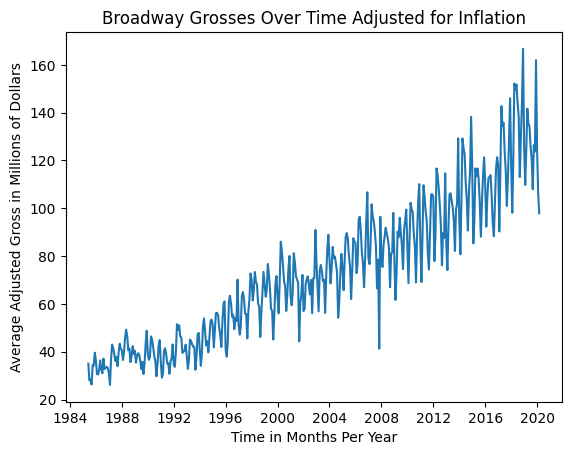

In [8]:
#Read the cpi.csv file
cpi = pd.read_csv('cpi.csv').set_index("year_month")
cpi.index = pd.to_datetime(cpi.index)

#Ignore the first five months of CPI data since the grosses.csv dataset begins in June and not January
cpi = cpi.iloc[5:]

#Group the overall gross by week, then by month
grossesByWeek = grosses.groupby('week_ending')['weekly_gross_overall'].agg(['mean'])
grossesByMonth = grossesByWeek.resample('MS').mean()

#The rename_axis function was retrieved from the pandas dovumentation website at 
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename_axis.html on May 5, 2022
#Rename the axis so that the two tables are able to be joined
grossesByMonth.rename_axis('year_month')

#Join the two tables together
grosses_with_cpi = pd.concat([grossesByMonth, cpi], axis=1)

#Calculate the values adjusted for inflation
grosses_with_cpi["adjusted grosses"] = (grosses_with_cpi['mean'] / grosses_with_cpi['cpi']) * 100

#Output the data table
print(grosses_with_cpi)

#Plot the adjusted grosses over time as a line graph
plt.plot(grosses_with_cpi["adjusted grosses"])
plt.xlabel("Time in Months Per Year")
plt.ylabel("Average Adjusted Gross in Millions of Dollars")
plt.title("Broadway Grosses Over Time Adjusted for Inflation");

**Summary:** The cpi.csv table was joined with part of the grosses.csv table to compare the rate of grosses over time with the an index of inflation. Some Broadway fans have expressed concern that Broadway has been making less money over time due to a lack of interest from the public, so expressing how Broadway grosses have changed over time with inflation in mind will help to investigate this claim. Adjusting for inflation is esstential in this case since the dataset spans four decades of data, so inflation will have a key role in analyzing the data. 

The CPI is an index of inflation that allows one to adjust monetary values for inflation. According to Sachin Date of TimeSeriesReasoning.com at https://timeseriesreasoning.com/contents/inflation-adjustment/, one can adjust monetary values for inflation by dividing the actual value by the CPI and multiplying by 100. This formula was applied to the joined tables to discover how Broadway grosses changed over time when inflation is considered. 

As the graph shows, Broadway grosses have steadily increased over time when adjusted for inflation, so the claims that Broadway is generating less gross over time may not be accurate.

## Grouping Data

                  mean      cpi  adjusted prices
1985-06-01   27.366418  109.100        25.083793
1985-07-01   25.974451  109.400        23.742643
1985-08-01   26.438464  109.800        24.078747
1985-09-01   26.266010  110.000        23.878191
1985-10-01   27.777549  110.500        25.138053
...                ...      ...              ...
2019-11-01  111.158538  265.501        41.867465
2019-12-01  133.623026  265.832        50.265967
2020-01-01  121.016308  266.476        45.413586
2020-02-01  115.499747  267.070        43.246994
2020-03-01  104.748929  266.795        39.261953

[418 rows x 3 columns]


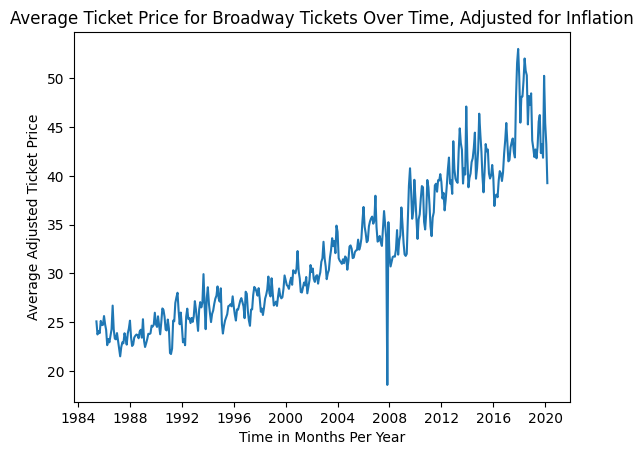

In [9]:
#Group the average ticket price by week, aggregating them by their average, and resample it into months
avgTicketPriceByWeek = grosses.groupby('week_ending')['avg_ticket_price'].agg(['mean'])
avgTicketPriceByMonth = avgTicketPriceByWeek.resample('MS').mean()

#The rename_axis function was retrieved from the pandas dovumentation website at 
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename_axis.html on May 5, 2022
#Rename the index so it can be joined with the CPI data
avgTicketPriceByMonth.rename_axis('year_month')

#Join the ticket price data with the CPI data
adjustedTicketPrices = avgTicketPriceByMonth
avg_ticket_price_with_cpi = pd.concat([adjustedTicketPrices, cpi], axis=1)

#Calculate the average ticket price adjusted for inflation
avg_ticket_price_with_cpi['adjusted prices'] = (avg_ticket_price_with_cpi["mean"] / avg_ticket_price_with_cpi["cpi"]) * 100

#Output the new table
print(avg_ticket_price_with_cpi)

#Plot the adjusted ticket prices over time as a line graph
plt.plot(avg_ticket_price_with_cpi['adjusted prices'])
plt.xlabel("Time in Months Per Year")
plt.ylabel("Average Adjusted Ticket Price")
plt.title("Average Ticket Price for Broadway Tickets Over Time, Adjusted for Inflation");

**Summary:** It is well known that Broadway tickets can be quite expensive, especially for the most popular shows. To investigate if these ticket prices have increased in price on average, the average ticket prices were grouped by month over time and joined with the CPI to calculate the average ticket prices adjusted for inflation. The adjusted prices were then graphed to show how they changed over time.

As the graph shows, the average ticket price for Broadway shows has increased over time when adjusted for inflation. This shows that tickets on Broadway have become more expensive over time. This could perhaps be due to an increase in demand for tickets or a need for a greater profit.

## Additional Feature

In [10]:
#Data from shows that did not record percent capacity removed from the dataframe
unrecordedData = grosses.sort_values("pct_capacity").head(133)
editedGrosses = grosses.drop(unrecordedData.index)

#Group the grosses by their average weekly percent capacity and find the minimum average for each period of five years
editedGrosses = editedGrosses.groupby('week_ending')['pct_capacity'].agg('mean').resample('5AS').min()
capacityFiveYears = pd.DataFrame(editedGrosses)

#Pivot the table so that the percent capacity is the index
capacityFiveYears = capacityFiveYears.pivot_table(values='pct_capacity', 
                                                  columns = [['1985', '1990', '1995', '2000', '2005', '2010', '2015', '2020']], 
                                                  fill_value=0.0)

**Source Cited:** The following block of code is based off of the code from "Table Visualizations: Styler Functions: Acting on Data" from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html. It was retrieved May 11, 2022.

In [12]:
'''
Function Name: styleColors
Description:   Set the color of the text as red if the percent capacity
               is less than 50% and set the color as green if it is 
               over 80%
Parameters:    pctCapacity - the minimum average percent capacity in a 
                             period of five years
Return Value:  'color:red;' - if the percent is less than 50%
               'color:green;' - if the percent is more than 80%
               None - if the percent is greater than 50% and less than 80%
'''
def styleColors(pctCapacity):
    if pctCapacity < .50:
        return 'color:red;'
    elif pctCapacity > .80:
        return 'color:green;'
    else:
        return None

#Output the stylized table
styledCapacity = capacityFiveYears.style.applymap(styleColors)
styledCapacity

,1985,1990,1995,2000,2005,2010,2015,2020
pct_capacity,0.466626,0.628517,0.600567,0.424717,0.633950,0.676486,0.746313,0.906671


**Summary:** This table shows the minimum weekly average percent capacity in periods of five years. Through stylizing the table to output the percents less than 50% in red and the percents greater than 80% in green, it is found that the period from 1985-1989 and the period from 2000-2004 had a week in which the average capacity was less than 50%, which suggests a low audience attendance. The period beginning in 2020 had the largest minimum average capacity as the only period in green. This suggests a high audience attendance, but because the dataset's data ends in 2020, there is a smaller sample of data in this period, so a definite conclusion likely cannot be made. 

## Conclusion

This notebook investigated various aspects of a dataset regarding statistics about shows performed on Broadway from June 9, 1985 to March 1, 2020. The investigation found that Broadway tends to make a larger gross during its stronger months of December, November, March, April, May, and June. It also found the top ten most performed shows and found that those shows account of more than 20% of all performances. It also joined the CPI table with the grosses table to calculate the grosses when adjusted for inflation and found that the average gross has increased over time, even when adjusted for inflation. The average ticket prices for each show were grouped together by month, and their average was joined with the CPI table to show how the average ticket prices have increased over time, even when adjusted for inflation. The minimum average percent capacity for the periods of five years was calculated and stylized to note the periods with the lowest and highest average capacities, with the lowest periods being 1985-1989 and 2000-2004 and the highest period being the one beginning in 2020, though this data is from only half of the one year, so it likely cannot create a certain conclusion. 